In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
D=pd.read_csv('bank.csv',sep=';')
D.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
D.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Este dataset es un dataset de apertura de nuevas cuentas en un banco

## 1. Análisis del problema

En este dataset se espera observar las relaciones existentes entre las diferentes variables que el banco considera relevantes para la apertura de nuevas cuentas. Se espera dar información pertinente para ver que estratégias tomar para captación de nuevos clientes.

## 2. Observar el dataset

In [ ]:
len(D)

4119

In [ ]:
[type(x) for x in D.columns]

[str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str]

Se observa el primer problema en el dataset siendo que todas las variables son de tipo string. Vamos a tener que considerar una transformación

In [ ]:
D.shape

(4119, 21)

El dataset consta de 4119 líneas de información de clientes distribuidos en 20 variables explicativas y una variable objetivo

In [ ]:
D.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Entre las 20 variables explicativas, 10 de ellas son de caracter cuantitativo, lo cuál implica que 10 de ellas también son cualitativas.

Remarcamos que no existen datos faltantes en el dataset, al menos para las variables cuantitativas (todas las variables tienen el máximo número de datos)

## 3. Análisis de variables

In [ ]:
D.job.unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

Existen 10 categorías de trabajo

In [ ]:
D.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

Existen 4 categorías de estado civil

In [ ]:
D.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Existen 8 categorías de educación

In [ ]:
D.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

Existen 3 categorías de si no pagó deudas anteriormente

In [ ]:
D.loan.unique()

array(['no', 'unknown', 'yes'], dtype=object)

3 categorías tambien de si tiene un crédito no hipotecario

In [ ]:
D.housing.unique()

array(['yes', 'no', 'unknown'], dtype=object)

3 categorías si tiene un crédito hipotecario

In [ ]:
D.contact.unique()

array(['cellular', 'telephone'], dtype=object)

2 categorías para el tipo de contacto

Las variables month and day of the week no requieren un análisis más profundo

(array([3.293e+03, 6.170e+02, 1.350e+02, 5.700e+01, 9.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([   0. ,  364.3,  728.6, 1092.9, 1457.2, 1821.5, 2185.8, 2550.1,
        2914.4, 3278.7, 3643. ]),
 <BarContainer object of 10 artists>)

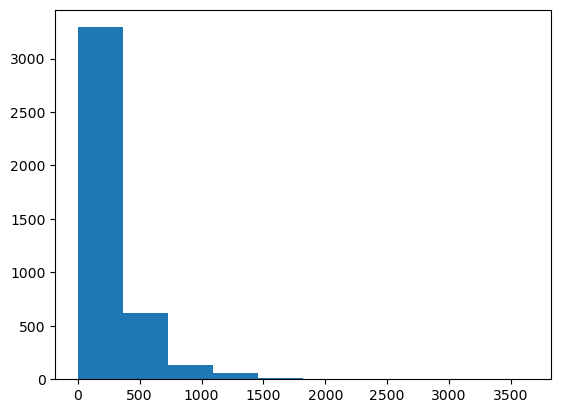

In [ ]:
plt.hist(D.duration)

La mayoría de los datos de duración estan en 0, por lo cuál voy a tratar de relacionarlo con otras variables

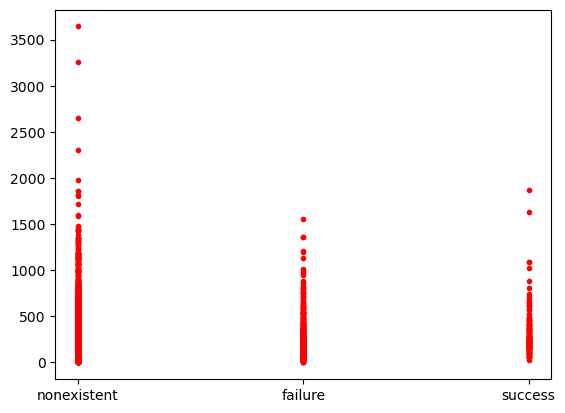

In [ ]:
plt.plot(D.poutcome,D.duration,'r.')
plt.show()

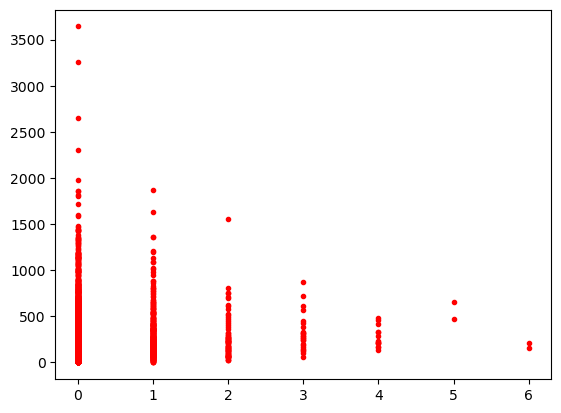

In [ ]:
plt.plot(D.previous,D.duration,'r.')
plt.show()

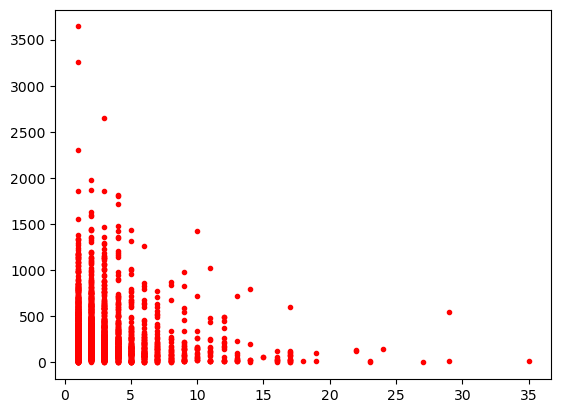

In [ ]:
plt.plot(D.campaign,D.duration,'r.')
plt.show()

La variable duración no tiene relación aparente con otras variables y no sabría darle la explicación adecuada correspondiente, a tener cuidado al utilizar esta variable

Las variables emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed son índices a los cuales debemos considerar la correlación

Podemos ver que tenemos buenas variables cualitativas para hacer segmentaciones y varias variables cuantitativas para las cuales podemos buscar correlaciones

## 4. Estadística descriptiva de los datos

El descriptivo elemental ha sido realizado en el punto 2, en ese caso voy a buscar relacionar las diferentes categorías con el objetivo, es decir que voy a buscar segmentar los datasets por categorías y luego extraer la variable objetivo segmentado por las categorías

In [ ]:
obj=[]
for i in range(len(D)):
    if D.y[i]=='yes':
        obj.append(1)
    else:
        obj.append(0)

In [ ]:
D['obj']=obj

Creamos una nueva variable booleana como objetivo porque en ella podemos usar diversas funciones cuantitativas

In [ ]:
D.obj.describe()

count    4119.000000
mean        0.109493
std         0.312294
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: obj, dtype: float64

En promedio tenemos 10.95% de exito por medio de las campañas

In [ ]:
D1=D.groupby('marital')

In [ ]:
D1['obj'].sum()/D1['obj'].count()*100

marital
divorced     9.641256
married     10.043842
single      13.443192
unknown      9.090909
Name: obj, dtype: float64

Podemos ver que el porcentaje de exito es ligeramente superior en el caso de las personas solteras, alcanzando un 13.44%

In [ ]:
D2=D.groupby('education')
D2['obj'].sum()/D2['obj'].count()*100

education
basic.4y                8.857809
basic.6y                7.456140
basic.9y                7.491289
high.school            10.532030
illiterate              0.000000
professional.course    12.149533
university.degree      13.053797
unknown                15.568862
Name: obj, dtype: float64

Tenemos más exito en nuestras campañas con las gente que tiene mayor estudio alcanzando porcentajes de 12.15% y 13.05%, mientras más alta sea la formación en principio tenemos mayor probabilidad de exito. Por otro lado remarcamos que tenemos un 15% de exito con datos desconocidos

In [ ]:
D2['obj'].count()/len(D)*100

education
basic.4y               10.415149
basic.6y                5.535324
basic.9y               13.935421
high.school            22.359796
illiterate              0.024278
professional.course    12.988589
university.degree      30.687060
unknown                 4.054382
Name: obj, dtype: float64

Los desconocidos representan un 4% de los datos, es algo que debemos exigir que se complete para mejorar nuestra información. Los puntos de profesionales o con grado universitario tienen porcentajes significativos y probabilidad de exito por encima de la media, por lo cuál ya tenemos una recomendación a hacer pidiendo que el público objetivo sean estos 2 grupos de personas

In [ ]:
D3=D.groupby('job')
D3['obj'].sum()/D3['obj'].count()*100

job
admin.           13.142292
blue-collar       6.900452
entrepreneur      5.405405
housemaid        10.000000
management        9.259259
retired          22.891566
self-employed     8.176101
services          8.905852
student          23.170732
technician       11.577424
unemployed       17.117117
unknown          10.256410
Name: obj, dtype: float64

In [ ]:
D3['obj'].count()/len(D)*100

job
admin.           24.569070
blue-collar      21.461520
entrepreneur      3.593105
housemaid         2.670551
management        7.865987
retired           4.030104
self-employed     3.860160
services          9.541151
student           1.990774
technician       16.775916
unemployed        2.694829
unknown           0.946832
Name: obj, dtype: float64

Tenemos mucha mayor probabilidad de exito con las personas retiradas, desempleadas y los estudiantes, con porcentajes de exito del 22.89%, 17.12% y 23.17%, lamentablemente estos sectores tienen muy baja representación en nuestra cartera de clientes. El objetivo sería ampliar el número de prospectos de estas categorías. Por otro lado tenemos a los administrativos que tenemos una probabilidad de exito por encima de la media y una alta representatividad, entonces nuestro objetivo también sería este grupo

Se puede seguir explorando la segmentación en diferentes variables cualitativas para aumentar nuestras recomendaciones o diversificar el tipo de recomendaciones.

## 5. Visualización de los datos

Vamos a visualizar los puntos anteriores como para que se hagan más facilmente comprensibles

In [ ]:
Aux1=D2['obj'].sum()
Aux1=pd.DataFrame(Aux1)
Aux1

,obj
education,
basic.4y,38
basic.6y,17
basic.9y,43
high.school,97
illiterate,0
professional.course,65
university.degree,165
unknown,26


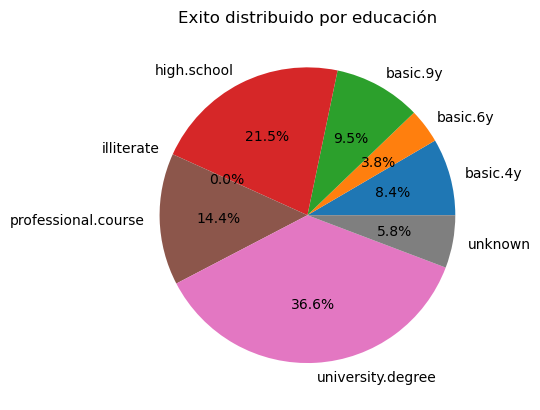

In [ ]:
plt.pie(Aux1.obj,labels=Aux1.index,autopct='%1.1f%%')
plt.title('Exito distribuido por educación')
plt.show()

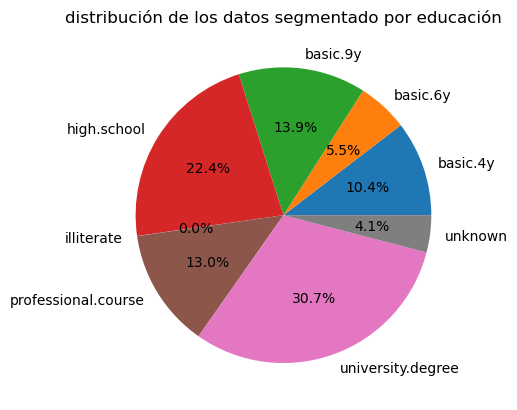

In [ ]:
Aux1=D2['obj'].count()
Aux1=pd.DataFrame(Aux1)
plt.pie(Aux1.obj,labels=Aux1.index,autopct='%1.1f%%')
plt.title('distribución de los datos segmentado por educación')
plt.show()

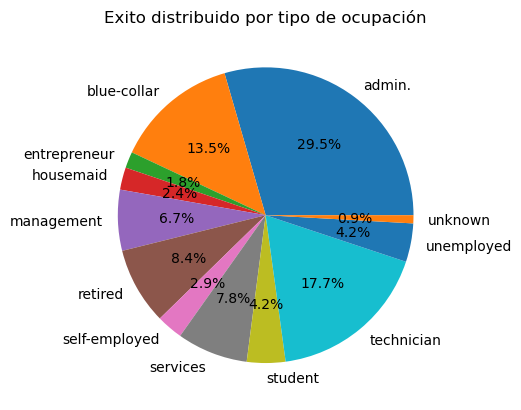

In [ ]:
Aux1=D3['obj'].sum()
Aux1=pd.DataFrame(Aux1)
plt.pie(Aux1.obj,labels=Aux1.index,autopct='%1.1f%%')
plt.title('Exito distribuido por tipo de ocupación')
plt.show()

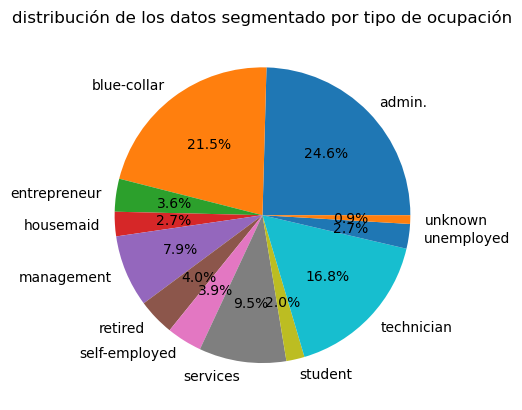

In [ ]:
Aux1=D3['obj'].count()
Aux1=pd.DataFrame(Aux1)
plt.pie(Aux1.obj,labels=Aux1.index,autopct='%1.1f%%')
plt.title('distribución de los datos segmentado por tipo de ocupación')
plt.show()

Estos 2 gráficos complementan a nuestro anterior análisis

## 6. Análisis Bivariado y Multivariado

In [5]:
C = D.corr(numeric_only=True)
C

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


En la tabla anterior podemos ver las correlaciones con la variable objetivo

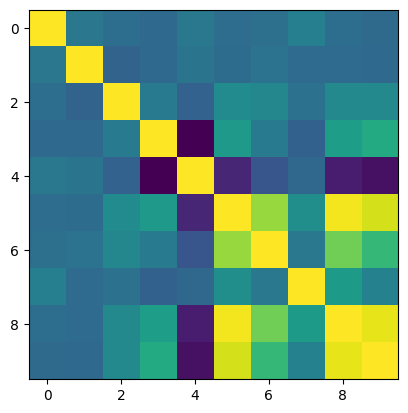

In [6]:
plt.imshow(C)
plt.show()

In [ ]:
La variable objetivo es nuestra prioridad, por lo tanto podemos ver que las variables 1,3,5,8 y 9 tienen buenas correlaciones directas o inversas con nuestra variable objetivo.

In [ ]:
lista=[1,3,5,8,9]
col=[]
data=[]
for i in lista:
    col.append(C.index[i])
    data.append(C.obj[i])
D4=pd.DataFrame({
    'columna':col,
    'correlación':data
})
D4

,columna,correlación
0,duration,0.418565
1,pdays,-0.332012
2,emp.var.rate,-0.283216
3,euribor3m,-0.298565
4,nr.employed,-0.349241


Podemos ver que las variables con mayor correlación son la duración, la cantidad de dias previos y los índices emp.var.rate, euribor3m y la tasa de desempleo

Los 3 índices tienen correlación inversa es decir que deberiamos iniciar una campaña cuando los valores de esos índices esten bajos.

## 7. Conclusiones y recomendaciones

Se ha realizado un ligero análisis exploratorio de datos para ver si podemos ligar diversos indicadores con la probabilidad de apertura de una nueva cuenta en un establecimiento financiero.

Nuestro porcentaje de exito obtenido con las campañas anteriores es bajo de alrededor del 11% y explorando los datos hemos determinado algunos grupos objetivo que deberiamos fijar para engrosar nuestra probabilidad de exito.

1. Debemos realizar campañas para los estudiantes, jubilados y desempleados. Sobretodo aumentando nuestra cartera dirigida hacia estos grupos, probablemente ofertando productos específicos para estos sectores.
2. Por otro lado los administrativos representan un excelente público objetivo y bien representado, simplemente dar preferencia a este grupo
3. Mientras mayor sea el grado de estudio mayor es la probabilidad de que tengamos éxito, por lo cuál se recomienda dar preferencias a los grupos de mayor estudio. Dar absoluta preferencia al grupo de profesionales y a los que tengan grados universitarios.
4. Varios índices tienen correlación inversa con nuestro éxito, por lo cuál se recomienda dirigir campañas en momentos en que estos índices esten en momentos bajos.

Se recomienda ampliar el estudio a la segmentación con las otras 7 variables cualitativas restantes, explorar en nubes de puntos las correlaciones de los índices para tener una idea de la correlación. Probablemente juntar variables representativas para ver si aumentamos la correlación obtenida.

In [ ]:
len(D1)

4